## Lecture 5 - KNN, Kernel Method, and Gaussian Process

### 1. K-Nearest Neighbors

KNN (K-Nearest Neighbor) is a simple supervised classification algorithm we can use to assign a class to new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
pair = (2, 3)

xlabel = iris.feature_names[pair[0]]
ylabel = iris.feature_names[pair[1]]

iris_x = iris.data[:,pair]
iris_y = iris.target

In [3]:
def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should be numpy arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    colDict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [4]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

#### Parameters
- **n_neighbors**: int, default=5
    - Number of neighbors to use by default for kneighbors queries.
- **weights**: {‘uniform’, ‘distance’} or callable, default=’uniform’
    - Weight function used in prediction. Possible values:
        - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
- **algorithm**: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    - Algorithm used to compute the nearest neighbors:
        - ‘ball_tree’ will use BallTree
        - ‘kd_tree’ will use KDTree
        - ‘brute’ will use a brute-force search.
        - ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
    - Note: fitting on sparse input will override the setting of this parameter, using brute force.
- **leaf_size**: int, default=30
    - Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
- **p**: int, default=2
    - Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
- **metric**: str or callable, default=’minkowski’
    - The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. For a list of available metrics, see the documentation of DistanceMetric and the metrics listed in sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS. Note that the “cosine” metric uses cosine_distances. If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.
- **metric_params**: dict, default=None
    - Additional keyword arguments for the metric function.
- **n_jobs**: int, default=None
    - The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.
#### Attributes
- **classes_**: array of shape (n_classes,)
    - Class labels known to the classifier
- **effective_metric_**: str or callble
    - The distance metric used. It will be same as the metric parameter or a synonym of it, e.g. ‘euclidean’ if the metric parameter set to ‘minkowski’ and p parameter set to 2.
- **effective_metric_params_** : dict
    - Additional keyword arguments for the metric function. For most metrics will be same with metric_params parameter, but may also contain the p parameter value if the effective_metric_ attribute is set to ‘minkowski’.
- **n_features_in_** : int
    - Number of features seen during fit.
##### Note (New in version 0.24.)
- **feature_names_in_**: ndarray of shape (n_features_in_,) 
    -  Names of features seen during fit. Defined only when X has feature names that are all strings.
##### Note (New in version 1.0.)
- **n_samples_fit_** : int
    - Number of samples in the fitted data.
- **outputs_2d_** : bool
    - False when y’s shape is (n_samples, ) or (n_samples, 1) during fit otherwise True.

In [8]:
knn.fit(iris_x,iris_y)
y_pred=knn.predict(iris_x)
metrics.accuracy_score(iris_y,y_pred)

0.9666666666666667

/var/folders/n0/3kqw7k395kb6swksbngs7zw40000gn/T/ipykernel_81578/3940458834.py:19: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap=cmap)


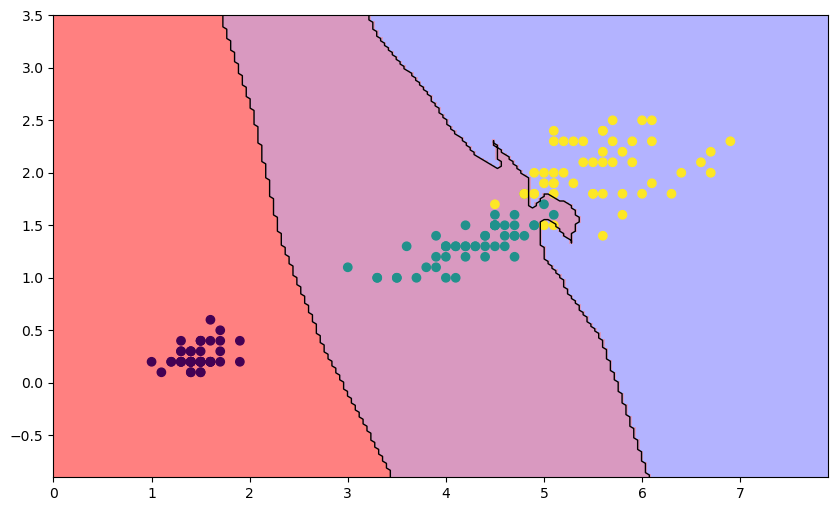

In [12]:
plt.figure(figsize=(10, 6))
plot_model(knn, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.show()

0.9733333333333334


/var/folders/n0/3kqw7k395kb6swksbngs7zw40000gn/T/ipykernel_81578/3940458834.py:19: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap=cmap)


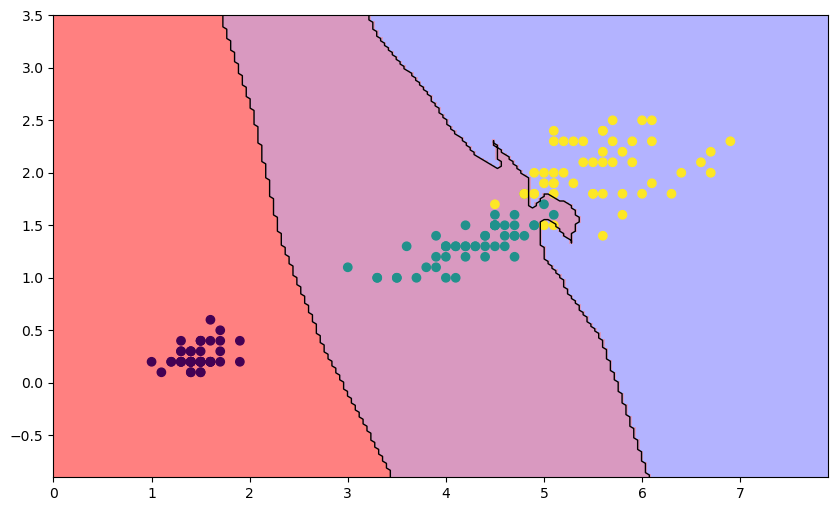

In [13]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(iris_x,iris_y)
y_pred=knn.predict(iris_x)
print(metrics.accuracy_score(iris_y,y_pred))
plt.figure(figsize=(10, 6))
plot_model(knn, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.show()

### 2. Kernel Methods

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x = np.array([1,1,2,3,3,6,6,6,9,9,10,11,12,13,16,18])
y = np.array([18,13,9,6,15,11,6,3,5,2,10,5,6,1,3,1])
label = np.array([1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1])

In [16]:
len(x)

16

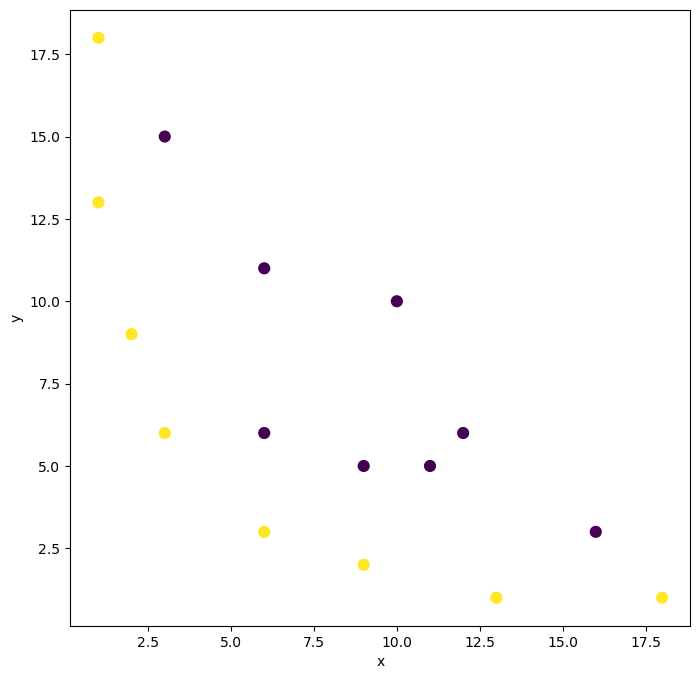

In [17]:
fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, s=60)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## $$k(x,y)=<x,y>^2=<x^2,\sqrt{2}xy,y^2>$$

In [18]:
def mapping(x, y):
    x = np.c_[(x, y)]				
    if len(x) >	2:
        x_1 = x[:,0]**2
        x_2 = np.sqrt(2)*x[:,0]*x[:,1]
        x_3 = x[:,1]**2								
    else:
        x_1 = x[0]**2
        x_2 = np.sqrt(2)*x[0]*x[1]
        x_3 = x[1]**2			    
    trans_x = np.array([x_1, x_2, x_3])				
    return trans_x

In [19]:
x_1  = mapping(x, y)
x_1.shape

(3, 16)

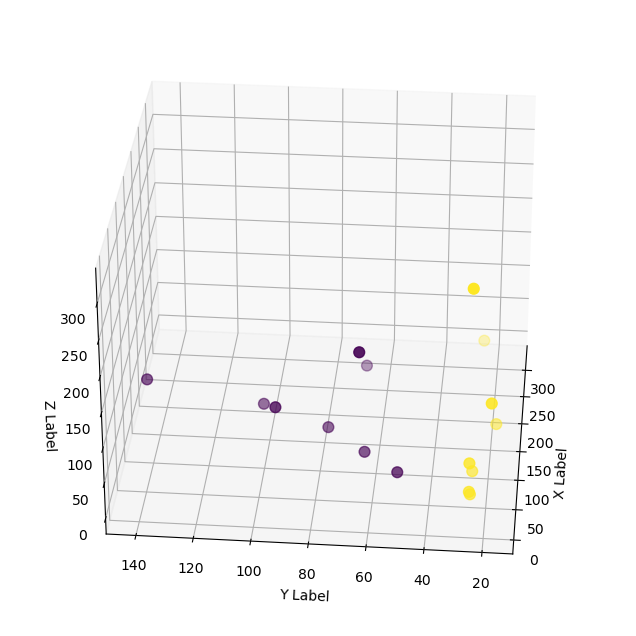

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[2], c=label, s=60)
ax.view_init(30, 185)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

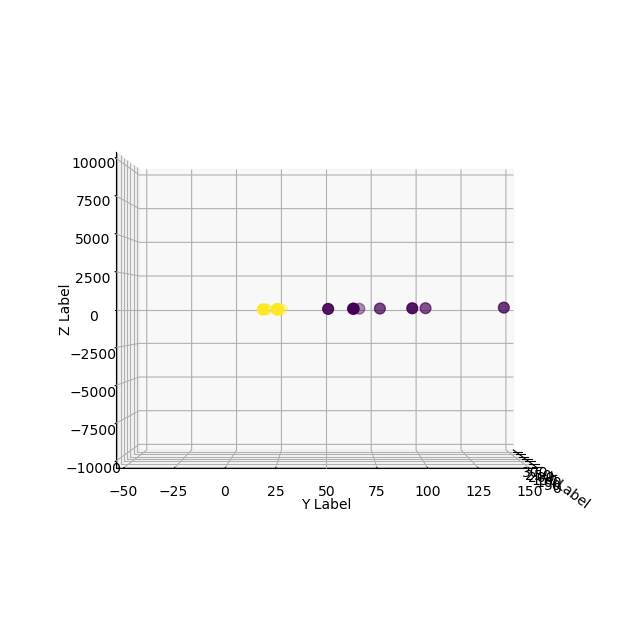

In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[1], c=label, s=60)
ax.view_init(0, -180)
ax.set_ylim([150,-50])
ax.set_zlim([-10000,10000])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## 3. Gaussian Process

In [22]:
def generate_noisy_points(n=10, noise_variance=1e-6):
    np.random.seed(777)
    X = np.random.uniform(-3., 3., (n, 1))
    X.sort(axis=0)
    y = X*np.sin(X) + np.random.randn(n, 1) * noise_variance**0.5
    return X, y

In [23]:
def kernel(x, y, thetas):
    sqdist = np.sum(x**2,1).reshape(-1,1) + \
             np.sum(y**2,1) - 2*np.dot(x, y.T)
    k1 = thetas[0]*np.exp(-.5 * (thetas[1]) * sqdist)
    k2 = thetas[3]*np.dot(x,y.T)
    return k1+thetas[2]+k2

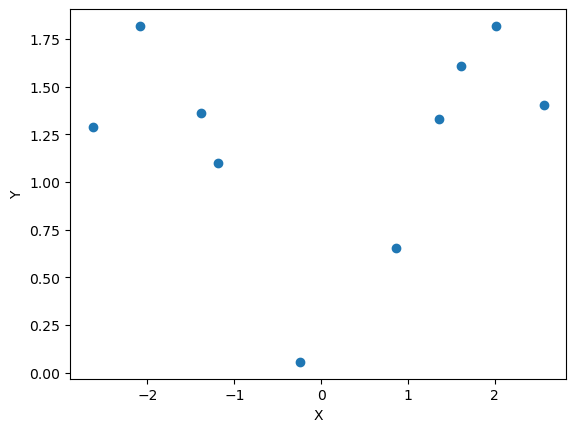

In [24]:
X, y = generate_noisy_points()
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [25]:
Xtest, ytest = generate_noisy_points(100)
Xtest.sort(axis=0)

In [26]:
def prior(Xtest,thetas):
    noise_var = 1e-6
    n_sample = 10
    Xtest.sort(axis=0)
    n = len(Xtest)
    K = kernel(Xtest, Xtest,thetas)
    L = np.linalg.cholesky(K + noise_var*np.eye(n))
    f_prior = np.dot(L, np.random.normal(size=(n, n_sample)))
    return f_prior


In [27]:
thetas1 = [1,10,1,0]
f_prior = prior(Xtest, thetas1)

In [28]:
def prior_plot(Xtest,f_prior,thetas):
    plt.plot(Xtest,f_prior)
    plt.xlabel('X')
    plt.ylabel('Prior')
    plt.title(fr'$\theta_i$={thetas}')
    plt.show()

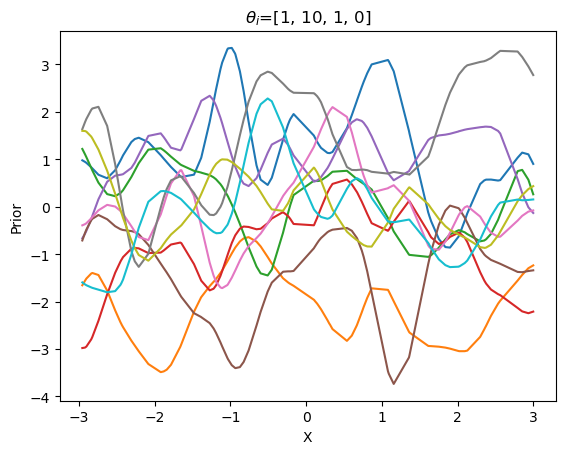

In [29]:
prior_plot(Xtest,f_prior,thetas1)

In [30]:
N, n = len(X), len(Xtest)
n_samples = 10
K = kernel(X, X,thetas1)
L = np.linalg.cholesky(K + noise_var*np.eye(N))
K_ = kernel(Xtest, Xtest,thetas1)
Lk = np.linalg.solve(L, kernel(X, Xtest,thetas1))
mu = np.dot(Lk.T, np.linalg.solve(L, y))
L = np.linalg.cholesky(K_ + noise_var*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,n_samples)))

NameError: name 'noise_var' is not defined

In [31]:
plt.plot(Xtest,f_post)
plt.show()

NameError: name 'f_post' is not defined

In [32]:
def posterior(X, Xtest, thetas, noise_var=1e-6):
    # compute the mean at our test points.
    N, n = len(X), len(Xtest)
    K = kernel(X, X, thetas)
    L = np.linalg.cholesky(K + noise_var*np.eye(N))
    Lk = np.linalg.solve(L, kernel(X, Xtest, thetas))
    mu = np.dot(Lk.T, np.linalg.solve(L, y))
    # compute the variance at our test points.
    K_ = kernel(Xtest, Xtest, thetas)
    sd = np.sqrt(np.diag(K_) - np.sum(Lk**2, axis=0))
    return (mu, sd)

In [ ]:
mu1, sd1 = posterior(X,Xtest,thetas1)
mu2, sd2 = posterior(X,X,thetas1)

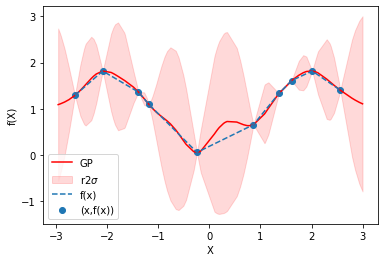

In [ ]:
plt.plot(Xtest,mu1,color='red',label='GP')
plt.fill_between(Xtest.flat,mu1.flat-2*sd1,mu1.flat+2*sd1,color='red',alpha=0.15,label='r2$\sigma$')
plt.plot(X,y,'--',label='f(x)')
plt.scatter(X,y,label='(x,f(x))')
plt.legend()
plt.xlabel('X')
plt.ylabel('f(X)')
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

#### For evaluation of the real function, the prediction, and its MSE

1. Define x for evaluation
2. Fit using GaussianPrecessRegressor (hyperparameters are adjustable, strongly encourage to look over them)
3. Make Predictions (Posterior)

#### Initiate GP: Give the kernel trick
I used the radial basis function kernel, a.k.a. RBF kernel, and the constant kernel. 

$$K(x,x')=\exp\large({\frac{-|| x-x'||^2}{2\sigma^2}})$$

$$K(x,x')=Ck(x,x')$$ 
where $C>0$.

For more information, visit https://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels. 

In [ ]:
kernel = C(1.0, (1e-3, 1e3))*RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)
gp.fit(X, y)

/Users/insukjang/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=20)

In [ ]:
y_pred, sigma = gp.predict(Xtest, return_std=True)
MSE1 = np.square(np.subtract(ytest,y_pred)).mean() 
print(MSE1)
print(np.mean(sigma))

5.115695901760781e-05
0.000509104365840484


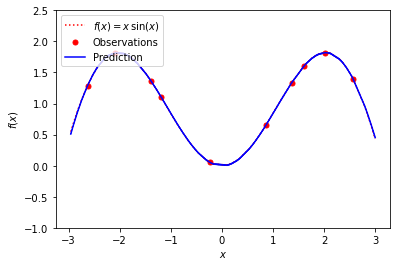

In [ ]:
plt.figure()
plt.plot(Xtest, ytest, 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(Xtest, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([Xtest, Xtest[::-1]]),
         np.concatenate([y_pred -  1.9600*sigma,
                        (y_pred +  1.9600*sigma)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-1,2.5)
plt.legend(loc='upper left')

plt.show()

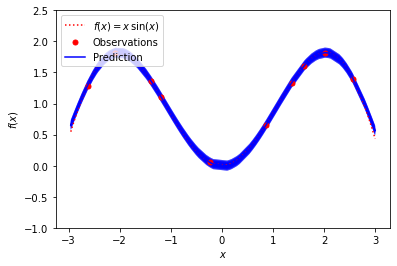

In [ ]:
kernel = RBF(10, (1e-1, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)
y_pred, sigma = gp.predict(Xtest, return_std=True)
plt.figure()
plt.plot(Xtest, ytest, 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(Xtest, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([Xtest, Xtest[::-1]]),
         np.concatenate([y_pred - 1.9600*sigma,
                        (y_pred +  1.9600*sigma)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-1.0, 2.5)
plt.legend(loc='upper left')
plt.show()